In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [2]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown
 99% 170M/172M [00:09<00:00, 27.4MB/s]
100% 172M/172M [00:09<00:00, 19.6MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/bone-fracture-detection-using-xrays.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-4-36398ed231ac>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import PIL
import PIL.Image

In [6]:
test_loc='/content/archive (6)/val'
train_loc='/content/archive (6)/train'

In [7]:
#dataset loader
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(96,96)
batch_size=10

train_dataset=image_dataset_from_directory(train_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="training",
                                           shuffle=True,
                                           seed=42)


test_dataset=image_dataset_from_directory(test_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           shuffle=True,
                                           seed=42)

Found 8863 files belonging to 2 classes.
Using 7091 files for training.
Found 600 files belonging to 2 classes.


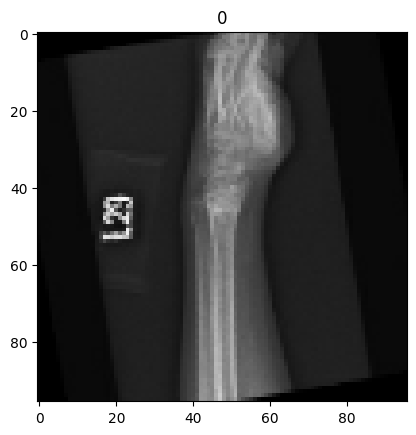

In [8]:
for images,labels in train_dataset.take(1):

    random_idx=random.randint(0,batch_size-1)

    random_image=images[random_idx]
    random_label=labels[random_idx]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(random_label.numpy())
    plt.show()


In [9]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.5 MB/s eta 0:00:00


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.7321 - accuracy: 0.5225

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 87s 254ms/step - loss: 0.7321 - accuracy: 0.5225 - val_loss: 0.7580 - val_accuracy: 0.4396
Epoch 2/30
222/222 [==============================] - 52s 232ms/step - loss: 0.5303 - accuracy: 0.7332 - val_loss: 0.9163 - val_accuracy: 0.5135
Epoch 3/30
222/222 [==============================] - 49s 223ms/step - loss: 0.4230 - accuracy: 0.8140 - val_loss: 1.3933 - val_accuracy: 0.5073
Epoch 4/30
222/222 [==============================] - 49s 220ms/step - loss: 0.3541 - accuracy: 0.8421 - val_loss: 0.9508 - val_accuracy: 0.5824
Epoch 5/30
222/222 [==============================] - 49s 222ms/step - loss: 0.3058 - accuracy: 0.8743 - val_loss: 1.2281 - val_accuracy: 0.5835
Epoch 6/30
222/222 [==============================] - 48s 218ms/step - loss: 0.2803 - accuracy: 0.8793 - val_loss: 1.1953 - val_accuracy: 0.5694
Epoch 7/30
222/222 [==============================] - 49s 219ms/step - loss: 0.2348 - accuracy: 0.9042 - val_loss: 1.3196 - val_accuracy: 0.5

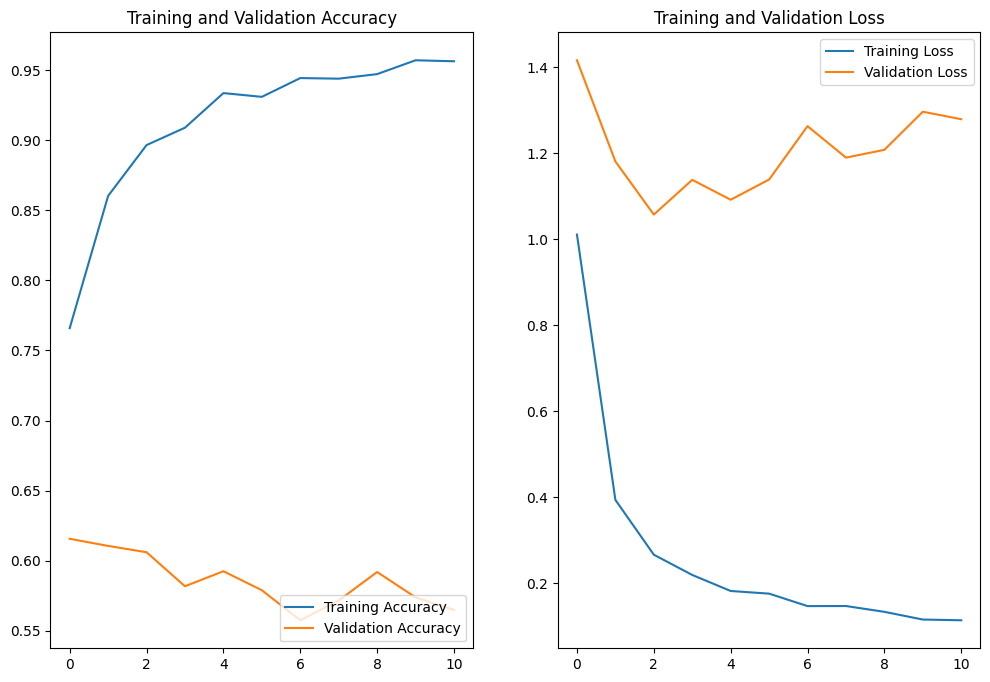

56/56 [==============================] - 12s 177ms/step
               precision    recall  f1-score   support

    fractured       0.52      0.54      0.53       896
not fractured       0.51      0.48      0.49       876

     accuracy                           0.51      1772
    macro avg       0.51      0.51      0.51      1772
 weighted avg       0.51      0.51      0.51      1772



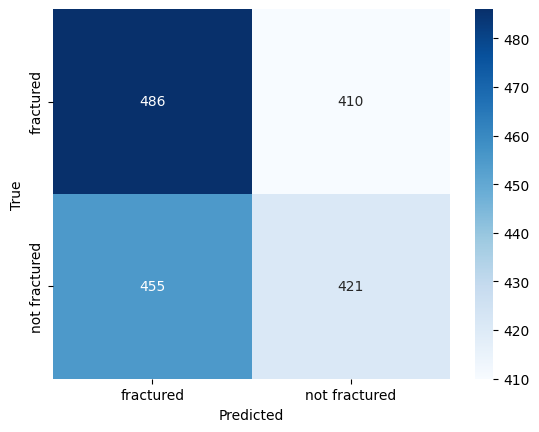

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D, MultiHeadAttention, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def self_attention_layer(x, num_heads=8, key_dim=64):
    # Reshape the input to 3D tensor for MultiHeadAttention layer
    x_reshaped = Reshape((1, -1))(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_reshaped, x_reshaped)
    attention_output = Reshape((-1,))(attention_output)

    # Add skip connection and normalization
    attention_output = Add()([x, attention_output])
    attention_output = LayerNormalization()(attention_output)

    return attention_output

def build_densenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Adding dense and attention layers alternatively
    x = Dense(1024, activation='relu')(x)
    x = self_attention_layer(x)
    x = Dense(256, activation='relu')(x)
    x = self_attention_layer(x)
    x = Dense(128, activation='relu')(x)
    x = self_attention_layer(x)

    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30, fine_tune_at=None):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )

    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True

        model.compile(optimizer=Adam(learning_rate=1e-5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        fine_tune_epochs = 10
        total_epochs = epochs + fine_tune_epochs

        history_fine = model.fit(
            train_generator,
            epochs=total_epochs,
            initial_epoch=history.epoch[-1],
            validation_data=validation_generator,
            callbacks=[checkpoint]
        )

        history.history.update(history_fine.history)

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_densenet_model()

    epochs = 30
    fine_tune_at = 400  # Adjust this value based on where you want to start fine-tuning

    history = train_model(model, train_generator, validation_generator, epochs=epochs, fine_tune_at=fine_tune_at)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


In [10]:
#dense try- swiss fuunction
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D, MultiHeadAttention, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.activations import swish

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def self_attention_layer(x, num_heads=8, key_dim=64):
    # Reshape the input to 3D tensor for MultiHeadAttention layer
    x_reshaped = Reshape((1, -1))(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_reshaped, x_reshaped)
    attention_output = Reshape((-1,))(attention_output)

    # Add skip connection and normalization
    attention_output = Add()([x, attention_output])
    attention_output = LayerNormalization()(attention_output)

    return attention_output

def build_densenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Adding dense and attention layers alternatively
    x = Dense(1024, activation=swish)(x)
    x = self_attention_layer(x)
    x = Dense(256, activation=swish)(x)
    x = self_attention_layer(x)
    x = Dense(128, activation=swish)(x)
    x = self_attention_layer(x)

    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30, fine_tune_at=None):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )

    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True

        model.compile(optimizer=Adam(learning_rate=1e-5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        fine_tune_epochs = 10
        total_epochs = epochs + fine_tune_epochs

        history_fine = model.fit(
            train_generator,
            epochs=total_epochs,
            initial_epoch=history.epoch[-1],
            validation_data=validation_generator,
            callbacks=[checkpoint]
        )

        history.history.update(history_fine.history)

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_densenet_model()

    epochs = 30
    fine_tune_at = 400  # Adjust this value based on where you want to start fine-tuning

    history = train_model(model, train_generator, validation_generator, epochs=epochs, fine_tune_at=fine_tune_at)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.7245 - accuracy: 0.5145

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 88s 297ms/step - loss: 0.7245 - accuracy: 0.5145 - val_loss: 0.7056 - val_accuracy: 0.5056
Epoch 2/30
222/222 [==============================] - 51s 228ms/step - loss: 0.6002 - accuracy: 0.6504 - val_loss: 0.8041 - val_accuracy: 0.5570
Epoch 3/30
222/222 [==============================] - 50s 225ms/step - loss: 0.4458 - accuracy: 0.7931 - val_loss: 0.9618 - val_accuracy: 0.5700
Epoch 4/30
222/222 [==============================] - 50s 227ms/step - loss: 0.3618 - accuracy: 0.8464 - val_loss: 1.0714 - val_accuracy: 0.5739
Epoch 5/30
222/222 [==============================] - 50s 226ms/step - loss: 0.3095 - accuracy: 0.8655 - val_loss: 0.9266 - val_accuracy: 0.5841
Epoch 6/30
222/222 [==============================] - 48s 217ms/step - loss: 0.2620 - accuracy: 0.8910 - val_loss: 1.2686 - val_accuracy: 0.5367
Epoch 7/30
222/222 [==============================] - 49s 222ms/step - loss: 0.2262 - accuracy: 0.9099 - val_loss: 1.1322 - val_accuracy: 0.5

KeyboardInterrupt: 

In [11]:
#dense novel - attention layers and swiss function.
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D, MultiHeadAttention, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.activations import swish
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def self_attention_layer(x, num_heads=8, key_dim=64):
    # Reshape the input to 3D tensor for MultiHeadAttention layer
    x_reshaped = Reshape((1, -1))(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_reshaped, x_reshaped)
    attention_output = Reshape((-1,))(attention_output)

    # Add skip connection and normalization
    attention_output = Add()([x, attention_output])
    attention_output = LayerNormalization()(attention_output)

    return attention_output

def build_densenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Adding dense and attention layers alternatively
    x = Dense(1024, activation=swish)(x)
    x = self_attention_layer(x)
    x = Dense(256, activation=swish)(x)
    x = self_attention_layer(x)
    x = Dense(128, activation=swish)(x)
    x = self_attention_layer(x)

    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30, fine_tune_at=None):
    initial_learning_rate = 0.001
    lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True)

    model.compile(optimizer=Adam(learning_rate=lr_schedule),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint, LearningRateScheduler(lr_schedule)]
    )

    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True

        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        fine_tune_epochs = 10
        total_epochs = epochs + fine_tune_epochs

        history_fine = model.fit(
            train_generator,
            epochs=total_epochs,
            initial_epoch=history.epoch[-1],
            validation_data=validation_generator,
            callbacks=[checkpoint, LearningRateScheduler(lr_schedule)]
        )

        history.history.update(history_fine.history)

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_densenet_model()

    epochs = 30
    fine_tune_at = 400  # Adjust this value based on where you want to start fine-tuning

    history = train_model(model, train_generator, validation_generator, epochs=epochs, fine_tune_at=fine_tune_at)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30
222/222 [==============================] - 64s 235ms/step - loss: 0.7282 - accuracy: 0.5159 - val_loss: 0.6974 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 2/30
222/222 [==============================] - 51s 228ms/step - loss: 0.6939 - accuracy: 0.5329 - val_loss: 0.8084 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 3/30
222/222 [==============================] - 51s 229ms/step - loss: 0.5125 - accuracy: 0.7535 - val_loss: 0.8406 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 4/30
222/222 [==============================] - 50s 226ms/step - loss: 0.4073 - accuracy: 0.8191 - val_loss: 1.1561 - val_accuracy: 0.5576 - lr: 0.0010
Epoch 5/30
222/222 [==============================] - 54s 242ms/step - loss: 0.3261 - accuracy: 0.8670 - val_loss: 1.0974 - val_accuracy: 0.5937 - lr: 9.6000e-04
Epoch 6/30
222/222 [==============================] - 49s 222ms/step - loss: 0.2514 - accuracy: 0.8958 - val_loss: 1.2698 

56/56 [==============================] - 12s 183ms/step
               precision    recall  f1-score   support

    fractured       0.51      0.53      0.52       896
not fractured       0.50      0.48      0.49       876

     accuracy                           0.51      1772
    macro avg       0.51      0.51      0.51      1772
 weighted avg       0.51      0.51      0.51      1772

